In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
d = pd.read_csv('fluct_6400000.000000_0.000000_1000000_0.001000.txt')
w = d.w[0]
N = d.N[0]
dx = d.dx[0]

# Сравнение Эйлера и Хойна

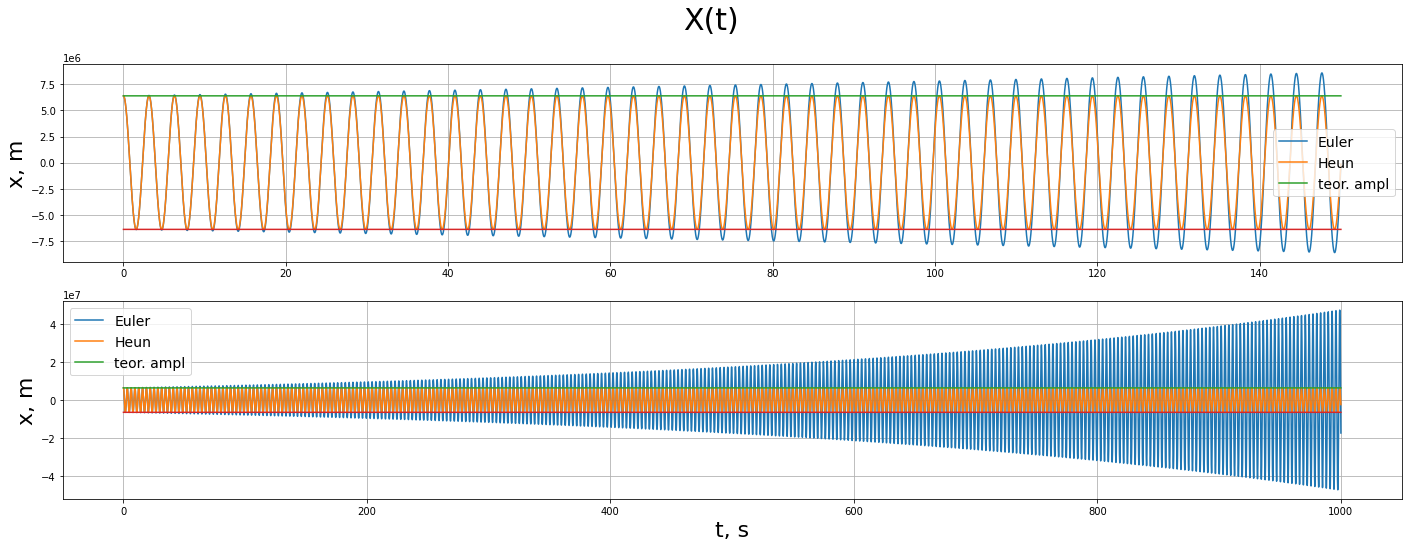

In [101]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('X(t)', fontsize=30)
fig.set_size_inches(24, 8)

t = np.linspace(0, d.N[0]*d.dx[0]*0.15, int(len(d)*0.15))
ax1.plot(t, d.x_e[:len(t)], '-', label='Euler')
ax1.plot(t, d.x_h[:len(t)], '-', label='Heun')
ax1.plot(t, t-t+6.4e6, label='teor. ampl')
ax1.plot(t, t-t-6.4e6)
ax1.set_ylabel('x, m', fontsize=22)
ax1.legend(fontsize=14, loc='best')

t = np.linspace(0, d.N[0]*d.dx[0], int(len(d)))
ax2.plot(t, d.x_e, '-', label='Euler')
ax2.plot(t, d.x_h, '-', label='Heun')
ax2.plot(t, t-t+6.4e6, label='teor. ampl')
ax2.plot(t, t-t-6.4e6)
ax2.set_ylabel('x, m', fontsize=22)
ax2.set_xlabel('t, s', fontsize=22)
ax2.legend(fontsize=14, loc='best')


ax1.grid(True)
ax2.grid(True)
plt.show()

Видно, что Хойн устойчивее (считалось на шаге 0,001).
Теоретическое предсказание нарисовал прямыми, потому что Хойн и теория становятся неотличимы.  
Проблема метода Эйлера в излишнем пренебрежении - за основу рассчета берется система
$\begin{cases}
v_{i+1} = v_i + a_i \Delta t,\\
x_{i+1} = x_i + v_i \Delta t
\end{cases}$. 
Но это неправильно, ведь при рассчете шага координаты мы считаем, что движение равномерное, а в рассчете скорости - что движение равноускоренное. Правильнее было бы
$\begin{cases}
v_{i+1} = v_i + a_i \Delta t,\\
x_{i+1} = x_i + v_i \Delta t + \frac{a_i}{2} (\Delta t)^2
\end{cases}$  
Хойн учитывает эту проблему усредняя по $i$ и $i+1$ шагу.

# Энергия

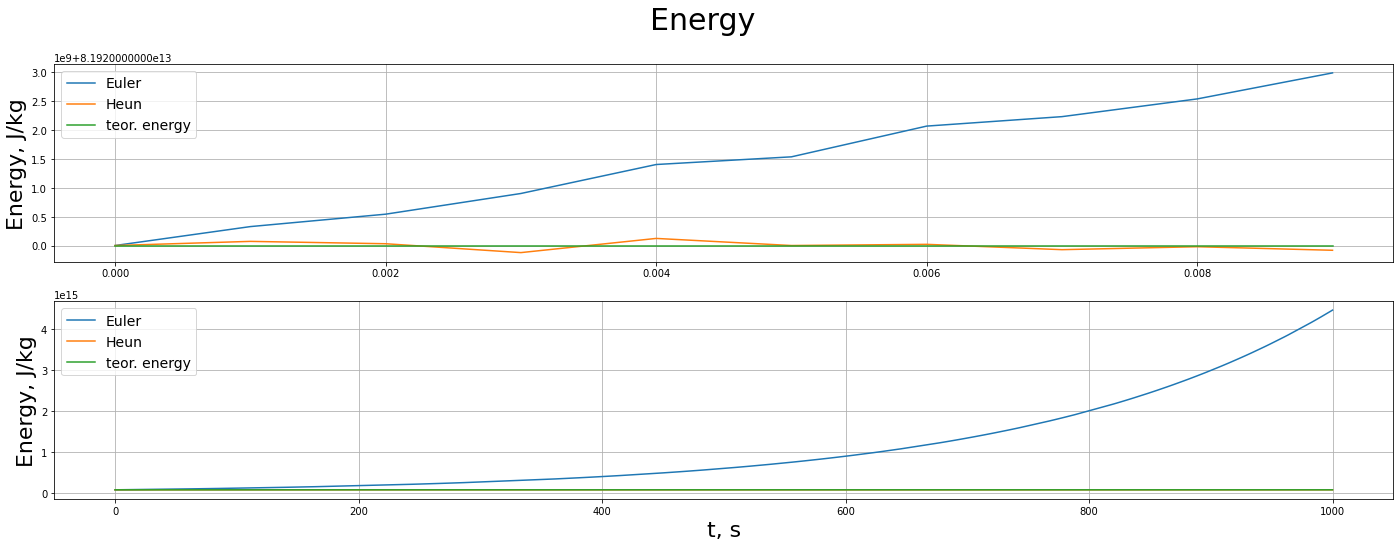

In [102]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Energy', fontsize=30)
fig.set_size_inches(24, 8)

t = np.linspace(0, d.N[0]*d.dx[0], len(d))
E_e = 0.5 * (d.v_e**2 + w**2*d.x_e**2)
E_h = 0.5 * (d.v_h**2 + w**2*d.x_h**2)

ax1.plot(t[:int(1e-5*len(t))], E_e[:int(1e-5*len(t))], '-', label='Euler')
ax1.plot(t[:int(1e-5*len(t))], E_h[:int(1e-5*len(t))], '-', label='Heun')
ax1.plot(t[:int(1e-5*len(t))], t[:int(1e-5*len(t))]-t[:int(1e-5*len(t))]+E_e[0], label='teor. energy')
ax1.set_ylabel('Energy, J/kg', fontsize=22)

ax2.plot(t, E_e, '-', label='Euler')
ax2.plot(t, E_h, '-', label='Heun')
ax2.plot(t, t-t+E_e[0], label='teor. energy')
ax2.set_ylabel('Energy, J/kg', fontsize=22)
ax2.set_xlabel('t, s', fontsize=22)

ax1.legend(fontsize=14, loc='best')
ax2.legend(fontsize=14, loc='best')
ax1.grid(True)
ax2.grid(True)
plt.show()

Как видно из графика, метод Эйлера не сохраняет энергию, она растет с экспоненциальной скоростью. Хойн же в среднем сохраняет энергию, отклонение от теории мало.

# Фазовая диаграмма

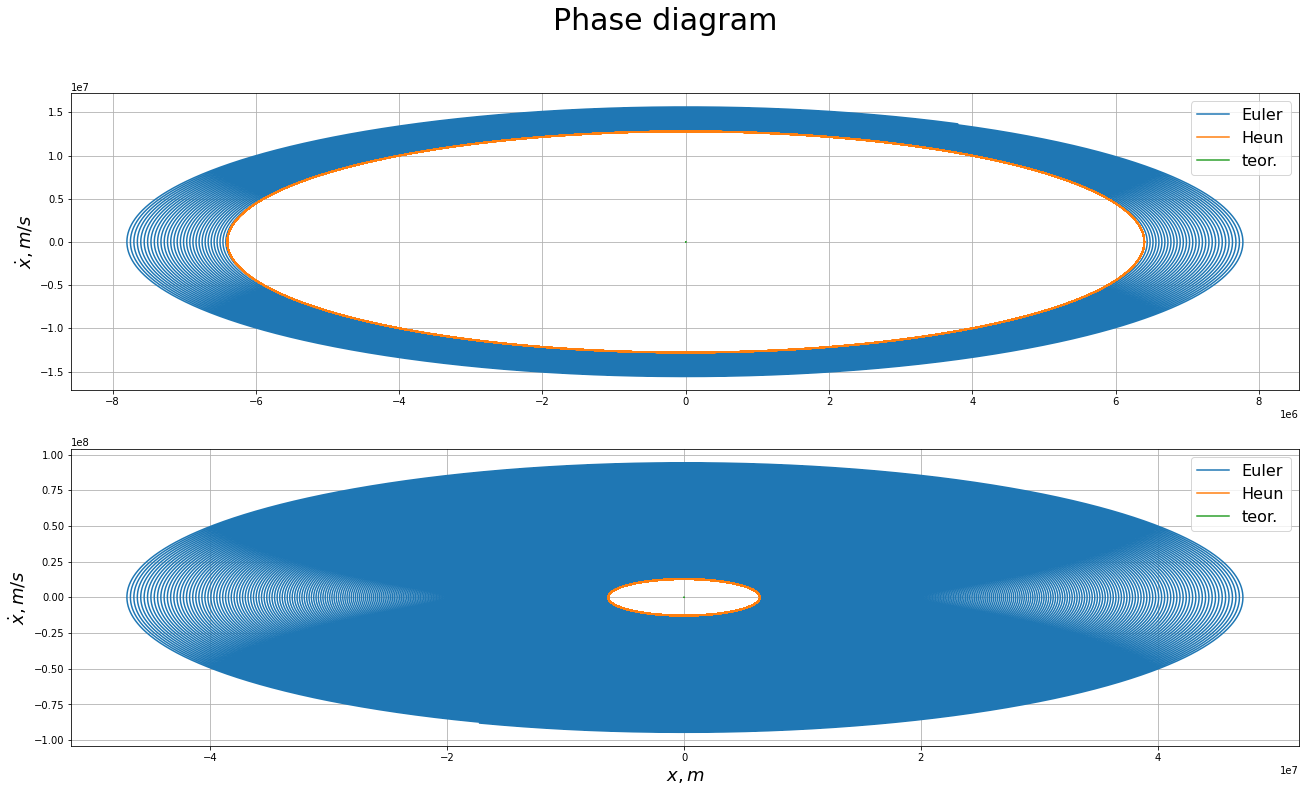

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Phase diagram', fontsize=30)
fig.set_size_inches(22, 12)

t = np.linspace(0, len(d), len(d))
A = np.sqrt(d.x_e[0]**2 + (d.v_e[0]/w)**2)
delta = -np.pi/2
if (d.x_e[0] != 0): delta = -np.arctan(d.v_e[0]/(d.x_e[0]*w))

ax1.plot(d.x_e[:int(len(d)*1e-1)], d.v_e[:int(len(d)*1e-1)], '-', label='Euler')
ax1.plot(d.x_h[:int(len(d)*1e-1)], d.v_h[:int(len(d)*1e-1)], '-', label='Heun')
ax1.plot(np.cos(w*t[:int(len(d)*1e-1)]+delta), np.sin(w*t[:int(len(d)*1e-1)]), '-', label='teor.')
ax1.set_ylabel('$\dot{x}, m/s$', fontsize=18)

ax2.plot(d.x_e, d.v_e, '-', label='Euler')
ax2.plot(d.x_h, d.v_h, '-', label='Heun')
ax2.plot(np.cos(w*t+delta), np.sin(w*t), '-', label='teor.')
ax2.set_ylabel('$\dot{x}, m/s$', fontsize=18)
ax2.set_xlabel('$x, m$', fontsize=18)

ax1.legend(fontsize=16, loc='best')
ax2.legend(fontsize=16, loc='best')
ax1.grid(True)
ax2.grid(True)
plt.show()

Фазовая диаграмма Эйлера "расходится", это не периодичное движение.
Хойн "сливается" с теоретической кривой.

# Применимость методов

## Эйлер

In [2]:
df = []
df.append(pd.read_csv(r'data\fluct_6400000_0_10_0.1.txt'))
df.append(pd.read_csv(r'data\fluct_6400000_0_10_0.05.txt'))
df.append(pd.read_csv(r'data\fluct_6400000_0_10_0.01.txt'))
df.append(pd.read_csv(r'data\fluct_6400000_0_10_0.005.txt'))
df.append(pd.read_csv(r'data\fluct_6400000_0_10_0.001.txt'))

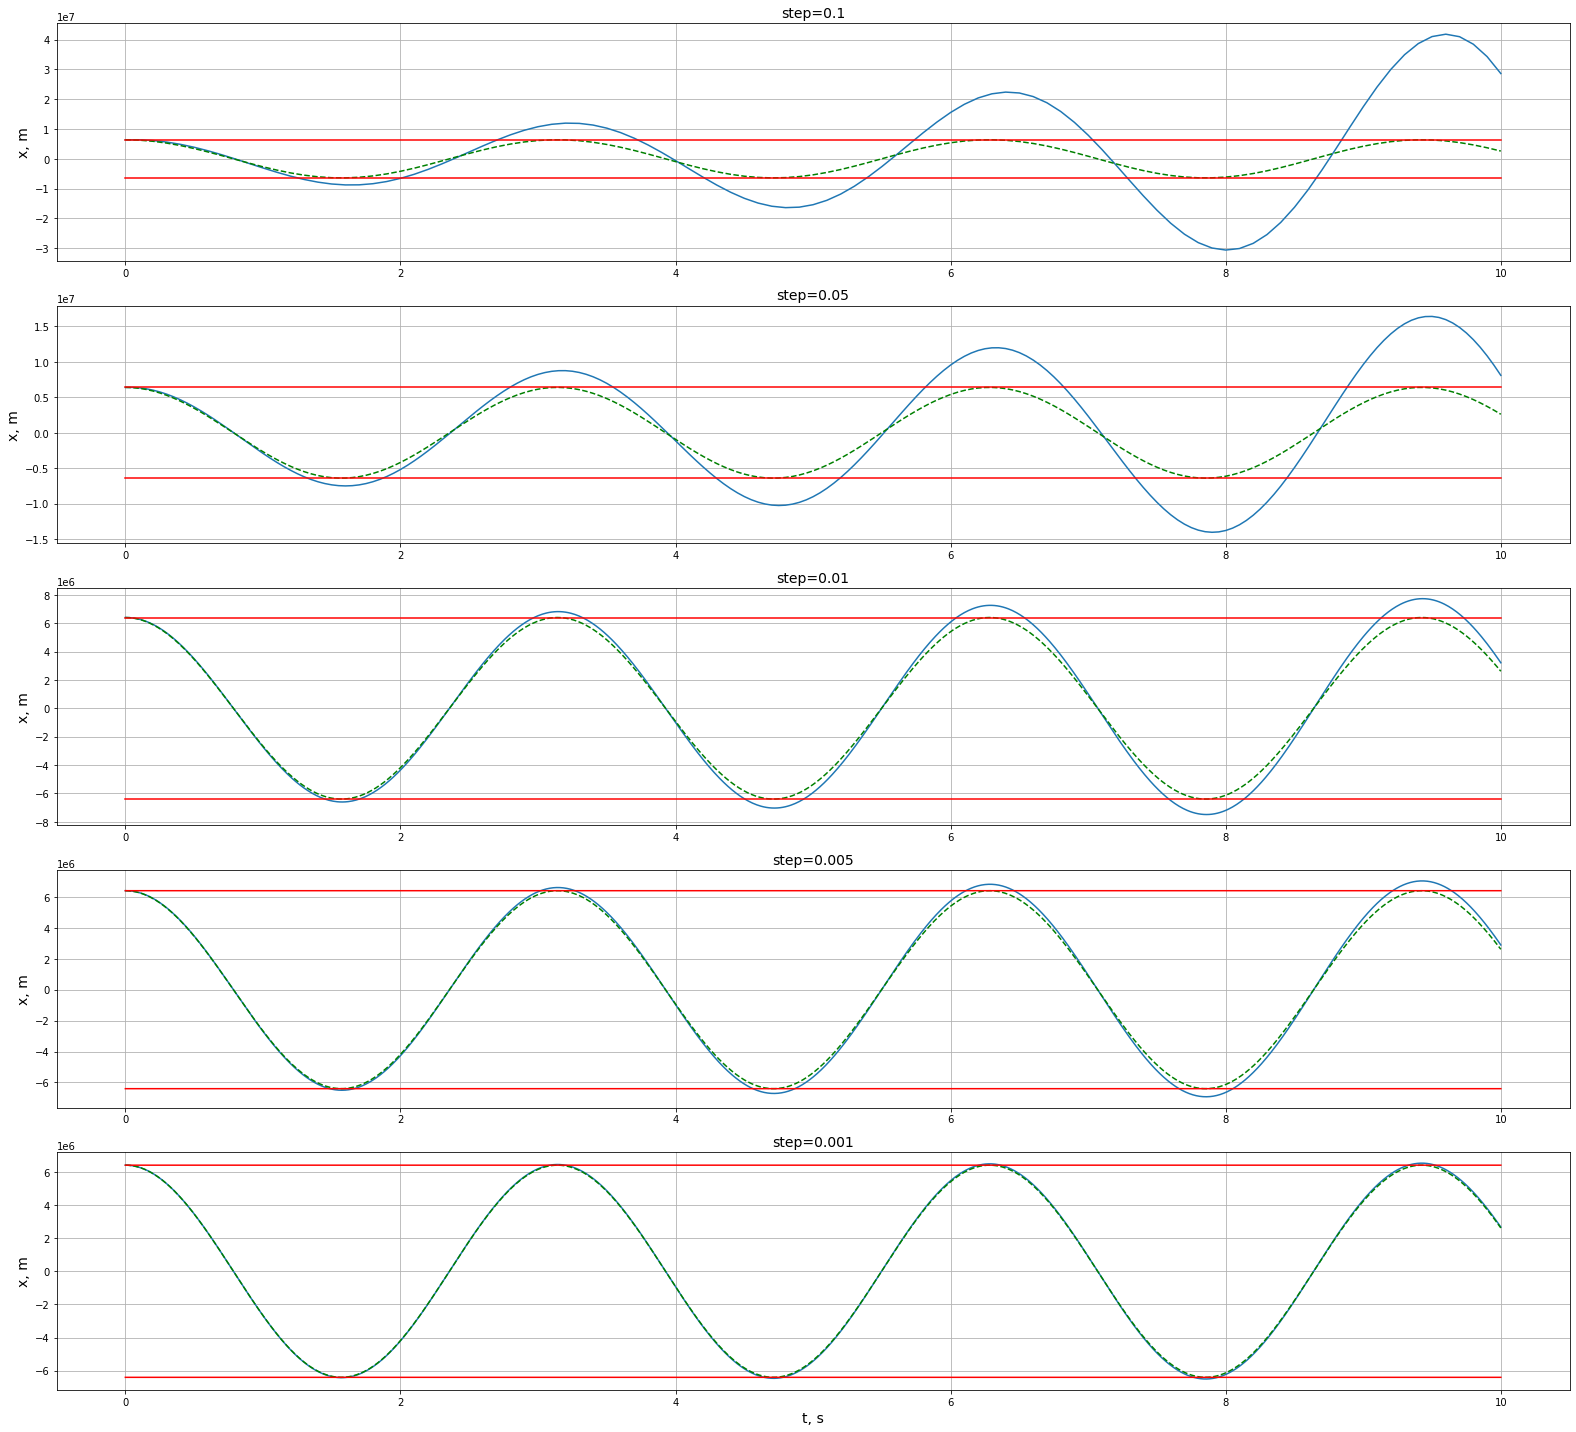

In [7]:
fig, ax = plt.subplots(len(df), 1)
fig.set_size_inches(22, 20)
#fig.suptitle('Euler\'s method with different step', fontsize=18)

for i in range(len(df)):
    t = np.linspace(0, df[i].L[0], int(df[i].L[0]/df[i].dx[0])+1)
    ax[i].plot(t, df[i].x_e[:len(t)], '-', label='step='+str(df[i].dx[0]))
    ax[i].plot(t, 6400000*np.cos(t*df[i].w[0]), '--', c='green')
    ax[i].plot(t, t-t+6400000, c='red')
    ax[i].plot(t, t-t-6400000, c='red')
    ax[i].set_title('step='+str(df[i].dx[0]), fontsize=14)
    ax[i].set_ylabel('x, m', fontsize=14)
    #ax[i].legend(fontsize=12, loc='upper left')
    ax[i].grid(True)
ax[len(df)-1].set_xlabel('t, s', fontsize=14)

fig.tight_layout()
plt.show()

## Хойн

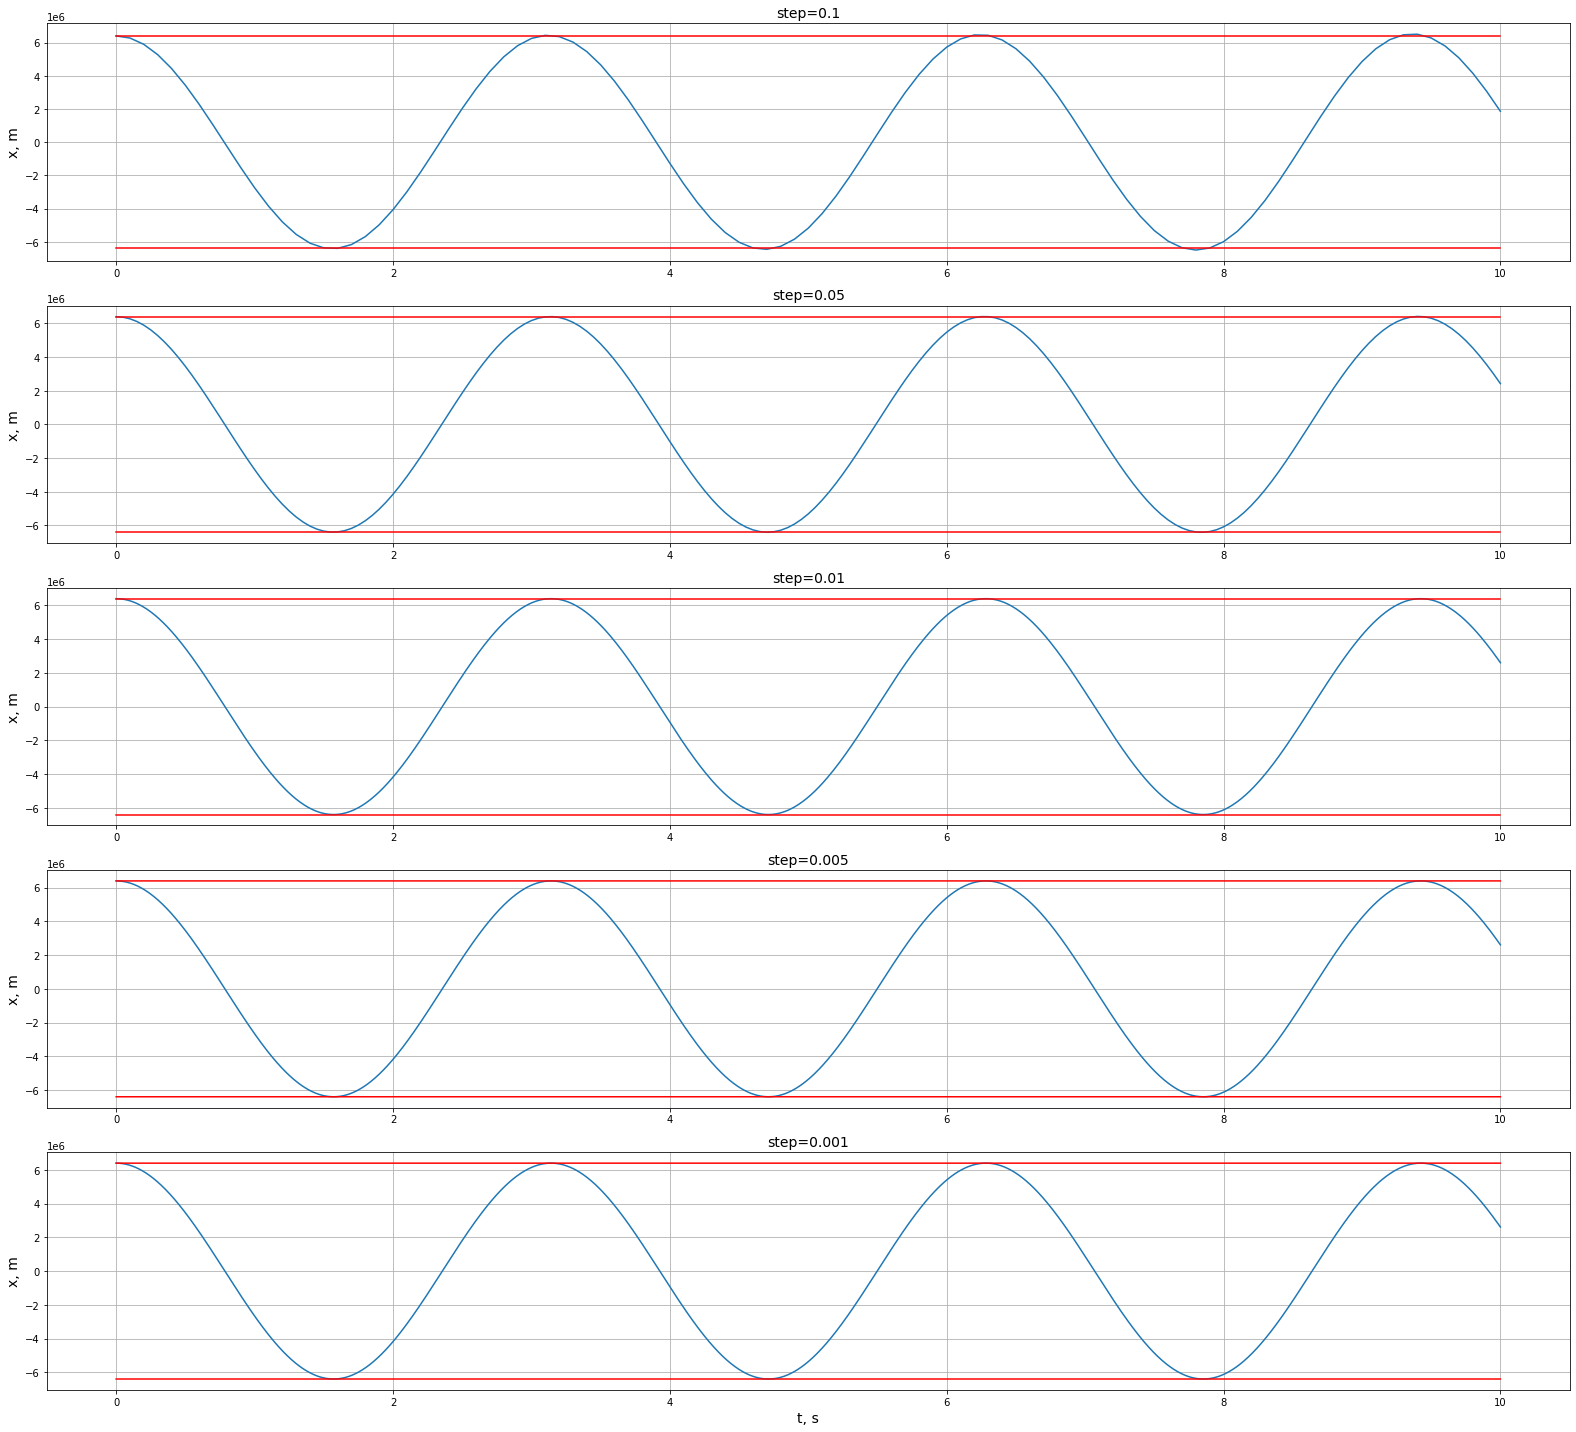

In [108]:
fig, ax = plt.subplots(len(df), 1)
fig.set_size_inches(22, 20)
#fig.suptitle('Euler\'s method with different step', fontsize=18)

for i in range(len(df)):
    t = np.linspace(0, df[i].L[0], int(df[i].L[0]/df[i].dx[0])+1)
    ax[i].plot(t, df[i].x_h[:len(t)], '-', label='step='+str(df[i].dx[0]))
    ax[i].plot(t, t-t+6400000, c='red')
    ax[i].plot(t, t-t-6400000, c='red')
    ax[i].set_title('step='+str(df[i].dx[0]), fontsize=14)
    ax[i].set_ylabel('x, m', fontsize=14)
    #ax[i].legend(fontsize=12, loc='upper left')
    ax[i].grid(True)
ax[len(df)-1].set_xlabel('t, s', fontsize=14)

fig.tight_layout()
plt.show()